**Notebook pour l'étude de la géométrie d'acquisition sur les courbe de dispertion**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import fonction_stage as st

**I - Le NEAR FIELD EFFECT**

selon ? (Bodet) Dans la thèse d'elias. Pour les wl > L (longueur du dispositif) l'identification de la courbe de dispersion n'est plus très précise  

In [2]:
L=24  #m  !à modifier!
wlmax1=L  #wlmax est la longueur d'onde max que l'on peux mesurer de façon fiable, au delà non fiable

print('wlmax1 =', wlmax1, 'm')

wlmax1 = 24 m


Selon Zywycki, Park, Stokoe, il ne faut considérer que les longueur d'onde inféreieur à deux fois la distance entre le premier recepteur et la source (x1)

In [3]:
x1=6 #m !A modifier!
wlmax2=2*x1
print('wlmax2 =', wlmax2, 'm')

wlmax2 = 12 m


selon O'Neill (2004) la longueur du dispositif est primordiale et les longueur d'onde mesurer de façon fiable doivent être inférieur à 0.4*L

In [4]:
wlmax3=0.4*L
print('wlmax3 =', wlmax3, 'm')

wlmax3 = 9.600000000000001 m


Ensuite selon les cas, et la vitesse des ondes on poura déterminé les limite basse en fréquence en fonction de la vitesse

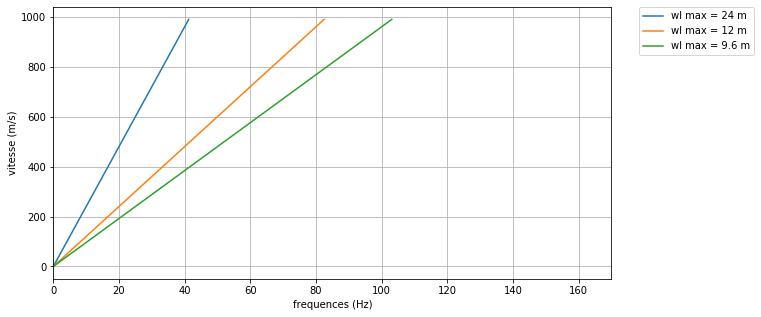

In [5]:
v=np.arange(0,1000,10)      #??     

fmin1=v/wlmax1
fmin2=v/wlmax2
fmin3=v/wlmax3

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(fmin1,v, label="wl max = 24 m") #ne pas oublier de changer la legende
plt.plot(fmin2,v,  label="wl max = 12 m")
plt.plot(fmin3,v,  label="wl max = 9.6 m")
plt.xlim(0,170)
plt.xlabel('frequences (Hz)')
plt.ylabel('vitesse (m/s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Aliasing quand wl<2*dx (distance  entre recepteurs) Park

In [6]:
dx=1     #m   distance entre recepteurs
wlmin=2*dx

print('wlmin=', wlmin, "m")

wlmin= 2 m


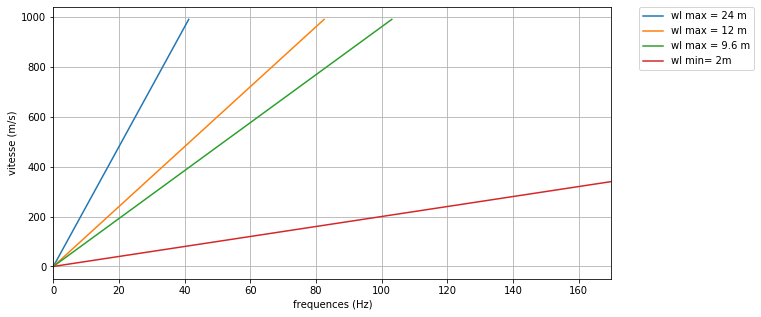

In [7]:
v=np.arange(0,1000,10)      #??     

fmax=v/wlmin

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(fmin1,v, label="wl max = 24 m") #ne pas oublier de changer la legende
plt.plot(fmin2,v,  label="wl max = 12 m")
plt.plot(fmin3,v,  label="wl max = 9.6 m")
plt.plot(fmax,v, label="wl min= 2m")
plt.xlim(0,170)
plt.xlabel('frequences (Hz)')
plt.ylabel('vitesse (m/s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Test sur une courbe de dispersion 

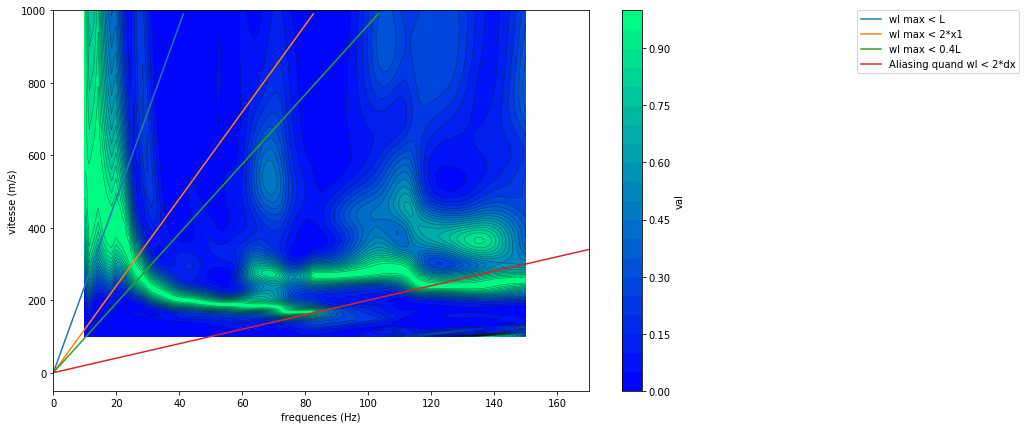

In [8]:

st.plot_dispcurve('courbe_disp2.txt')

v=np.arange(0,1000,10)      #??     

fmax=v/wlmin

plt.plot(fmin1,v, label="wl max < L") #ne pas oublier de changer la legende
plt.plot(fmin2,v,  label="wl max < 2*x1")
plt.plot(fmin3,v,  label="wl max < 0.4L ")
plt.plot(fmax,v, label="Aliasing quand wl < 2*dx")
plt.xlim(0,170)
plt.xlabel('frequences (Hz)')
plt.ylabel('vitesse (m/s)')
plt.legend(bbox_to_anchor=(1.5, 1), loc=2, borderaxespad=0.)

In [9]:
def plot_dispcurve_lim(file, name='file.png',plotvmin=100,plotvmax=1000,plotfmin=10 ,plotfmax=150, L=24, x1=6, dx=1):
    """plot_dispcurve_lim('file.txt', name='file.png')
    
    plotvmin= vitesse min sur le graph (pour les lim), par défault 10
    plotvmax= vitesse max sur le graph (pour les lim), par défault 1000
    plotfmin= fréquence min sur le graph(pour les lim), par défault 10
    plotfmax= fréquence max sur le graph (pour les lim), par défault 150
    
    L= longueur du dispo, par défaut 24m
    x1= distance source premier recepteur, par defaut 6m 
    dx= distance entre recepteurs, par defaut 1m
    
    """
    data = np.loadtxt(file,skiprows = 1)
    
    x = np.reshape(data[:,0],(-1,len(np.unique(data[:,0]))))
    y = 1/(np.reshape(data[:,1],(-1,len(np.unique(data[:,0])))))
    z = np.reshape(data[:,2],(-1,len(np.unique(data[:,0]))))
    
    plt.figure(figsize= (12,7))
    plt.grid()
    cf = plt.contourf(x,y,z,20, cmap='winter')
    plt.colorbar(label = 'val')
    plt.contour(cf,colors = 'k',linewidths = 0.5,alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    
    #courbes limites
    wlmax1=L  #wlmax est la longueur d'onde max que l'on peux mesurer de façon fiable, au delà non fiable
    print('wlmax1 (pour wl max < L) =', wlmax1, 'm')

    wlmax2=2*x1
    print('wlmax2 (pour wl max < 2*x1) =', wlmax2, 'm')

    wlmax3=0.4*L
    print('wlmax3 (wl max < 0.4L) =', wlmax3, 'm')
    
    wlmax4=0.5*L
    print('wlmax4 (edf : wl< 0.5L)=', wlmax4, 'm')

    wlmin=2*dx
    print('wlmin (pour aliasing quand wl < 2*dx)=', wlmin, "m")

    #plot
    v=np.arange(plotvmin,plotvmax,10)         
    fmin1=v/wlmax1
    fmin2=v/wlmax2
    fmin3=v/wlmax3
    fmin4=v/wlmax4
    fmax=v/wlmin

    plt.plot(fmin1,v, label="wl max < L") #ne pas oublier de changer la legende
    plt.plot(fmin2,v,  label="wl max < 2*x1")
    plt.plot(fmin3,v,  label="wl max < 0.4L ")
    plt.plot(fmin4,v, '--', label="edf : wl< 0.5L")
    plt.plot(fmax,v, label="Aliasing quand wl < 2*dx")
    plt.xlim(plotfmin,plotfmax)
    plt.ylim(plotvmin,plotvmax)
    plt.xlabel('frequences (Hz)')
    plt.ylabel('vitesse (m/s)')
    plt.legend(bbox_to_anchor=(1.5, 1), loc=2, borderaxespad=0.)
    
    plt.savefig(name)


wlmax1 (pour wl max < L) = 24 m
wlmax2 (pour wl max < 2*x1) = 12 m
wlmax3 (wl max < 0.4L) = 9.600000000000001 m
wlmax4 (edf : wl< 0.5L)= 12.0 m
wlmin (pour aliasing quand wl < 2*dx)= 2 m


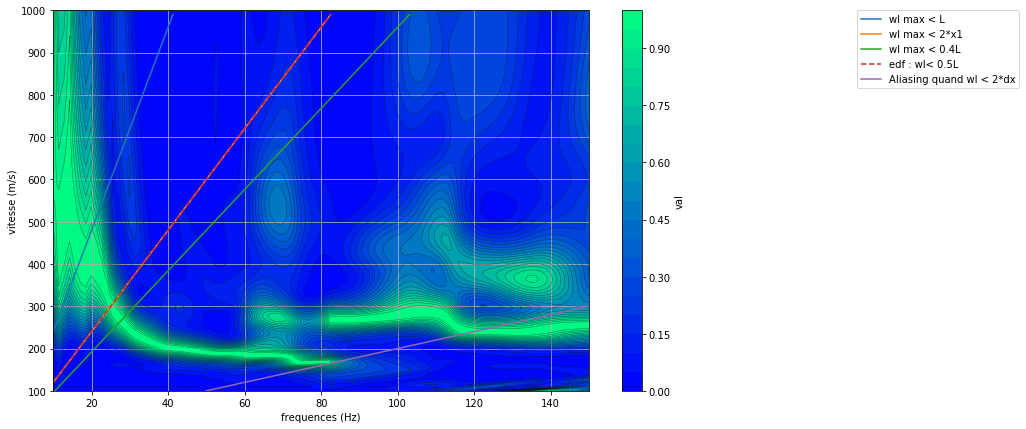

In [10]:
plot_dispcurve_lim('courbe_disp2.txt')